# Check Atmospheric profiles
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : November 127th 2018
- update : October 20th 2020


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
from astropy.io import fits

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
import libatmscattering as ray

# Configuration

In [17]:
lsst_altitude = 2.663 #km
lsst_pressure = 743 # hPa

## airmass

In [7]:
z_airmass=1.0

In [8]:
all_airmass=np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5])

In [9]:
NBSIMU=all_airmass.shape[0]

## Seasons

In [10]:
YEARSTR="2018"

### Winter

In [11]:
pwv_w=10.2
o3_w=370.1
P_w=932.8
aer_w=0

### Summer

In [12]:
pwv_s=25.1
o3_s=318.1
P_s=938.9
aer_s=0

## Altitude vs Pressure

In [13]:
altitudes=np.linspace(0.,10000.,5000)
press=ray.Pressure_adiabatic(altitudes)
press=press/100.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


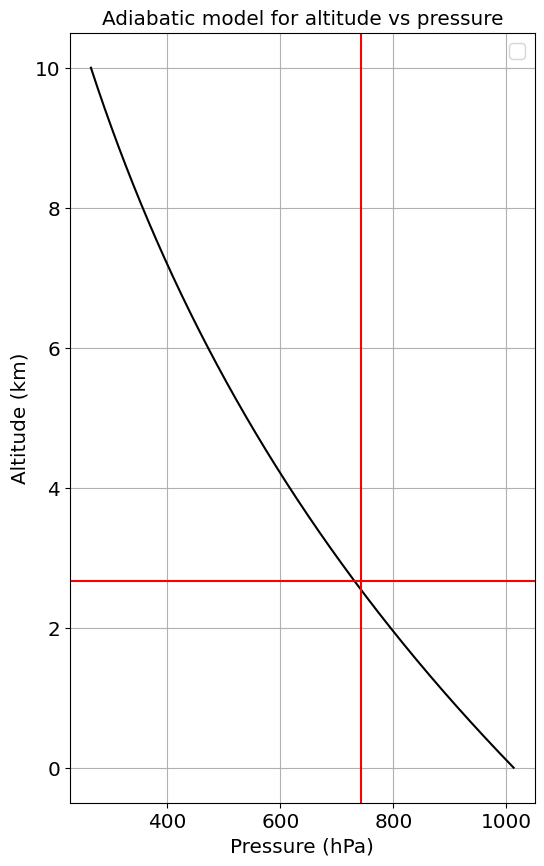

In [22]:
plt.figure(figsize=(6,10))
plt.title("Adiabatic model for altitude vs pressure")
figname="AtmModel.png"
plt.plot(press,altitudes/1000,'k-')
plt.xlabel("Pressure (hPa)")
plt.ylabel("Altitude (km)")
plt.axhline(lsst_altitude,color="red")
plt.axvline(lsst_pressure,color="red")
plt.legend()
plt.grid()
plt.savefig(figname)

## Altitude vs density

- L'air humide est moins lourd (dense) que l'air sec

In [15]:
T=273+20.
Hr=0.9
mass_density=ray.MassDensity_adiabatic(altitudes,T)
mass_density_h=ray.MassDensity_adiabatic_humid(altitudes,Hr,T)
kgm3_to_gl=1

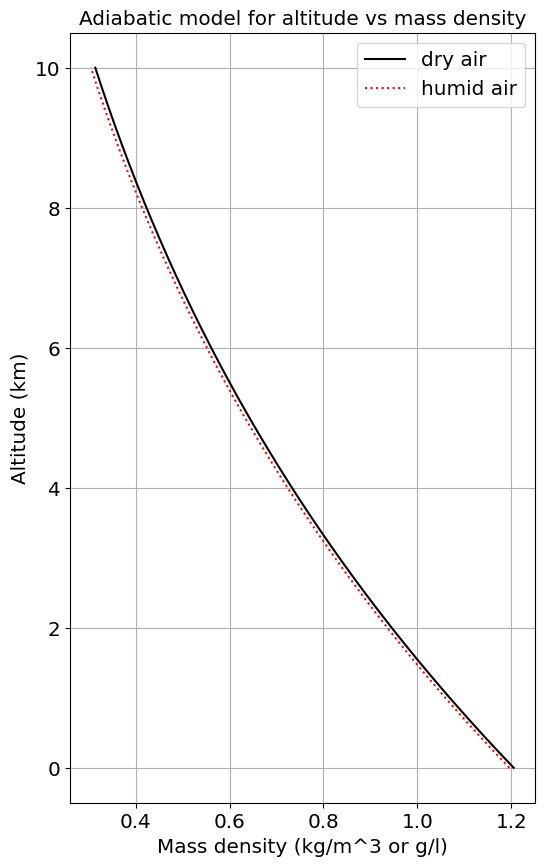

In [16]:
plt.figure(figsize=(6,10))
plt.title("Adiabatic model for altitude vs mass density")
figname="AirMassDensity.png"
plt.plot(mass_density,altitudes/1000,'k-',label='dry air')
plt.plot(mass_density_h,altitudes/1000,'r:',label='humid air')
plt.xlabel("Mass density (kg/m^3 or g/l)")
plt.ylabel("Altitude (km)")
plt.legend()
plt.grid()
plt.savefig(figname)